You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing with the following variables:   

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

By following these steps, you can develop a comprehensive understanding of decision tree modeling and its applications to real-world healthcare problems. Good luck!

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

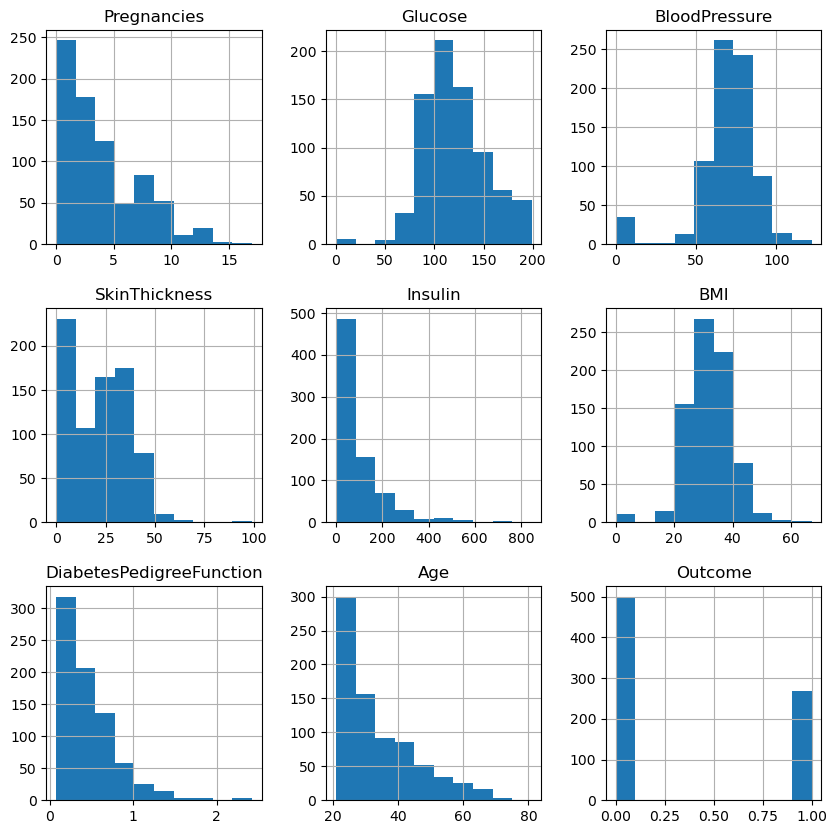

In [2]:
#1. Import the dataset and examine the variables
url = "https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing"
file_id = url.split("/")[5]
download_url = "https://drive.google.com/uc?id=" + file_id
df = pd.read_csv(download_url)

# Explore the variables
print(df.head())  # Display the first few rows
print(df.describe())  # Descriptive statistics
df.hist(figsize=(10, 10))  # Histograms
plt.show()

In [3]:
#2. Preprocess the data
# Handle missing values
df.dropna(inplace=True)  # Drop rows with missing values

# Split the dataset into features and target variable
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [4]:
#3. Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
#4. Train a decision tree model on the training set
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 0.7792207792207793
Precision: 0.6721311475409836
Recall: 0.7454545454545455
F1 Score: 0.7068965517241379
Confusion Matrix:
[[79 20]
 [14 41]]
ROC AUC Score: 0.7717171717171718


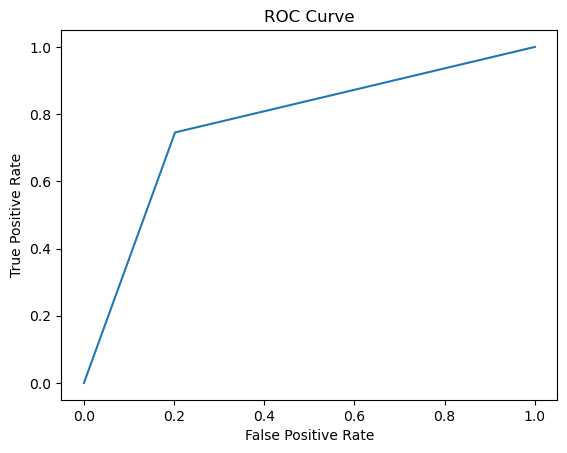

In [6]:
#5. Evaluate the performance of the decision tree model on the test set
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)
print("ROC AUC Score:", roc_auc)

# Visualize the ROC curve
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [7]:
#6. Interpret the decision tree
feature_importance = dt_model.feature_importances_
important_features = X.columns[feature_importance > 0]
print("Important Features:")
print(important_features)

Important Features:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [13]:
# Q7. Validate the decision tree model

# Scenario 1: Apply the model to new data

# Handle missing values
df.dropna(inplace=True)  # Drop rows with missing values

# Split the dataset into features and target variable
X_new = df.drop("Outcome", axis=1)
y_new = df["Outcome"]
# Apply the trained decision tree model to the new data
y_pred_new = dt_model.predict(X_new)

# Evaluate the performance of the model on the new data
accuracy_new = accuracy_score(y_new, y_pred_new)
precision_new = precision_score(y_new, y_pred_new)
recall_new = recall_score(y_new, y_pred_new)
f1_new = f1_score(y_new, y_pred_new)
confusion_mat_new = confusion_matrix(y_new, y_pred_new)
roc_auc_new = roc_auc_score(y_new, y_pred_new)

print("Performance on New Data:")
print("Accuracy:", accuracy_new)
print("Precision:", precision_new)
print("Recall:", recall_new)
print("F1 Score:", f1_new)
print("Confusion Matrix:")
print(confusion_mat_new)
print("ROC AUC Score:", roc_auc_new)


Performance on New Data:
Accuracy: 0.9557291666666666
Precision: 0.927007299270073
Recall: 0.9477611940298507
F1 Score: 0.9372693726937269
Confusion Matrix:
[[480  20]
 [ 14 254]]
ROC AUC Score: 0.9538805970149253
